<a href="https://colab.research.google.com/github/haidermn19/birds_sounds_classifier_using_Neural_Networks/blob/main/Bird_sound_classifier_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUDIO CLASSIFICATION USING MACHINE LEARNING**

#Installing dataset directly from kaggle

In [2]:
#!pip install kaggle

Connecting to google drive so we can save kaggle API credintials

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


make directory for kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/SE_Minor_Project/kaggle.json ~/.kaggle/kaggle.json

change file permission to read/write to owner only

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

Download the dataset

In [7]:
! kaggle datasets download vinayshanbhag/bird-song-data-set

 99% 2.08G/2.09G [00:26<00:00, 73.8MB/s]
100% 2.09G/2.09G [00:26<00:00, 84.7MB/s]


unzip the dataset

In [8]:
!unzip bird-song-data-set.zip

Streaming output truncated to the last 5000 lines.
  inflating: wavfiles/321906-11.wav  
  inflating: wavfiles/321906-12.wav  
  inflating: wavfiles/321906-13.wav  
  inflating: wavfiles/321906-2.wav   
  inflating: wavfiles/321906-3.wav   
  inflating: wavfiles/321906-4.wav   
  inflating: wavfiles/321906-5.wav   
  inflating: wavfiles/321906-6.wav   
  inflating: wavfiles/321906-7.wav   
  inflating: wavfiles/321906-8.wav   
  inflating: wavfiles/321906-9.wav   
  inflating: wavfiles/321913-0.wav   
  inflating: wavfiles/321913-1.wav   
  inflating: wavfiles/321913-10.wav  
  inflating: wavfiles/321913-11.wav  
  inflating: wavfiles/321913-12.wav  
  inflating: wavfiles/321913-13.wav  
  inflating: wavfiles/321913-2.wav   
  inflating: wavfiles/321913-3.wav   
  inflating: wavfiles/321913-4.wav   
  inflating: wavfiles/321913-5.wav   
  inflating: wavfiles/321913-8.wav   
  inflating: wavfiles/321913-9.wav   
  inflating: wavfiles/321914-0.wav   
  inflating: wavfiles/321914-1.wav   

Importing Dependencies

In [9]:
#https://goo.gl/8hY5ER
#to extract this download 7 zip on pc and then run :"C:\Program Files\7-Zip\7z" x UrbanSound8K.tar.gz  in the directory.Then right click and extract .tar using 7 zip
#!pip install librosa #helps work with sound signals, read it, find no of channels, etc

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
#When you use %matplotlib inline, it tells Jupyter to display the plots directly in the notebook interface,
#so you can see the plots right below the code cell where you create them. This is convenient for data visualization in interactive notebooks.


In [11]:
#!pip install librosa
#!pip install librosa.display
#!pip install IPython.display

In [12]:
import IPython.display as ipd
import librosa
import librosa.display



The **IPython.display** module provides tools for displaying various types of content, like audio and video, in Jupyter notebooks.
librosa library, is a popular Python library for analyzing and processing audio and music data.

**import librosa.display**: This line imports a specific submodule within the librosa library called display.
This submodule provides functions for visualizing audio data and analysis results.

You can use librosa to analyze and process audio, and IPython.display to visualize the results in your notebook.



Exploratory Data Analysis

In [13]:
filename= '/content/wavfiles/101308-0.wav'

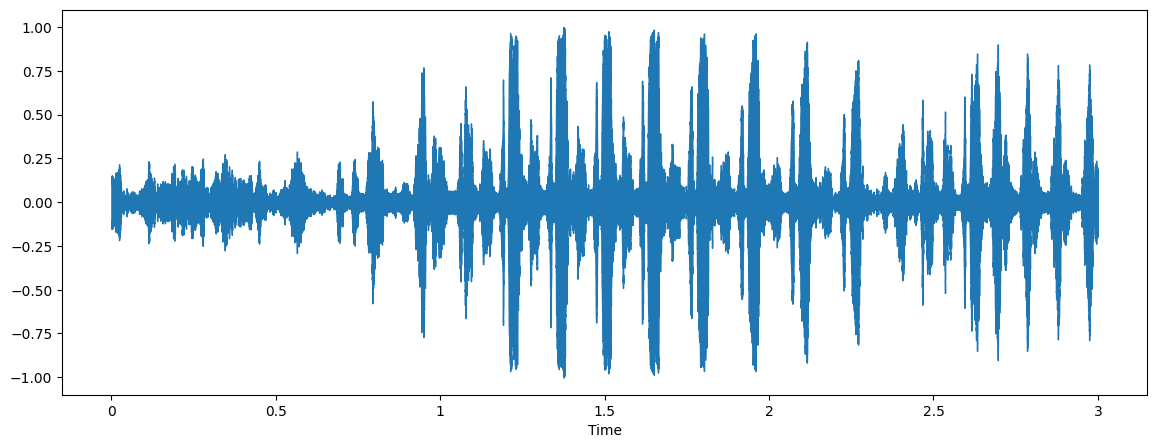

In [14]:
plt.figure(figsize=(14,5)) #to create a new figure or activate an existing figure
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate) #librosa.display.waveplot is old, won't work now
ipd.Audio(filename)


'**plt.figure(figsize=(14, 5))**: This line creates a new figure for a plot with a specific size of 14 units in width and 5 units in height. It sets the dimensions of the plot.

**data, sample_rate = librosa.load(filename)**: This line loads an audio file (specified by filename) using the librosa library. It returns two pieces of information: the audio data (sound waveform) and the sample rate, which tells you how many audio samples there are in one second. This is commonly used for audio analysis.

**librosa.display.waveplot(data, sr=sample_rate)**: This line generates a waveform plot of the audio data using librosa.display.waveplot. It displays the audio waveform as a visual representation. The sr parameter specifies the sample rate, ensuring the correct scaling of the waveform.

**ipd.audio(filename)**: This line uses the IPython.display library to play the audio file specified by filename directly within a Jupyter notebook. It allows you to listen to the audio in your notebook.

**summary:**, this code sets up a figure for plotting, loads an audio file, displays the waveform of the audio, and then plays the audio within a Jupyter notebook. It's a common workflow for visualizing and listening to audio data in Python.

In [15]:
#if we get file not found error, type !dir and run it to see all active directories under the nb. then compare the path typed by you.
#don't forget to write the file type in the file name.
!dir

bird-song-data-set.zip	bird_songs_metadata.csv  drive	sample_data  wavfiles


In [16]:
sample_rate
#standard sample_rate is 44,110 Hz i.e. 44 KHz but using librosa we read signals with sample rate of 22,050 Hz

22050

In [17]:
print(data) #we can see librosa gives us a normalised numpy array

print(data.size)   #this array contains 22050 * 4 values (4 secs is length of audio clip)

[-0.1333897  -0.03653242  0.06493116 ... -0.03692225 -0.11714743
 -0.1425361 ]
66150



##Advantage of Librosa over other libraries like wave
mono: same signal in both ears. so audio signal array is 1D

sterio: diff signals each ear. so audio signal array is more than 1D

Librosa standardizes every sound file to 22050 KHz, even though different audio files we have in our dataset are of diff sample rates.
Librosa has a mechanism that can convert each file to 22050 sample rate.
it also converts each file to mono, i.e. channel would be 1.

In [18]:
#using scipy.io lib's wavfile function

In [19]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)
librosa_audio=data

from scipy.io: This line indicates that you want to import a module named io from the scipy library. scipy is a scientific computing library in Python, and io is a subpackage within scipy that deals with Input/Output operations.

import wavfile as wav: This part of the code imports a submodule called wavfile from the io package and assigns it the alias wav. The wavfile submodule provides functions for reading and writing WAV audio files. By using the alias wav, you can reference functions from this submodule with the wav prefix.

In [20]:
print("WAVE sample rate is:")
print(wave_sample_rate)
print()
print("Librosa sample rate is: ")
sample_rate

WAVE sample rate is:
22050

Librosa sample rate is: 


22050

In [21]:
print("WAVE audio signal")
print(wave_audio)
print()
print("Librosa audio signal ")
data

#each audio signal of sound wave can be represented by a number. Combining these numbers we get a wave
#so we see librosa normalizes the signal values bw -1 to +1 to get a regular pattern. It also only gives mono signal. It also converts sample rate to 22KHz

WAVE audio signal
[-0.1333897  -0.03653242  0.06493116 ... -0.03692225 -0.11714743
 -0.1425361 ]

Librosa audio signal 


array([-0.1333897 , -0.03653242,  0.06493116, ..., -0.03692225,
       -0.11714743, -0.1425361 ], dtype=float32)

Text(0.5, 1.0, 'sterio channel')

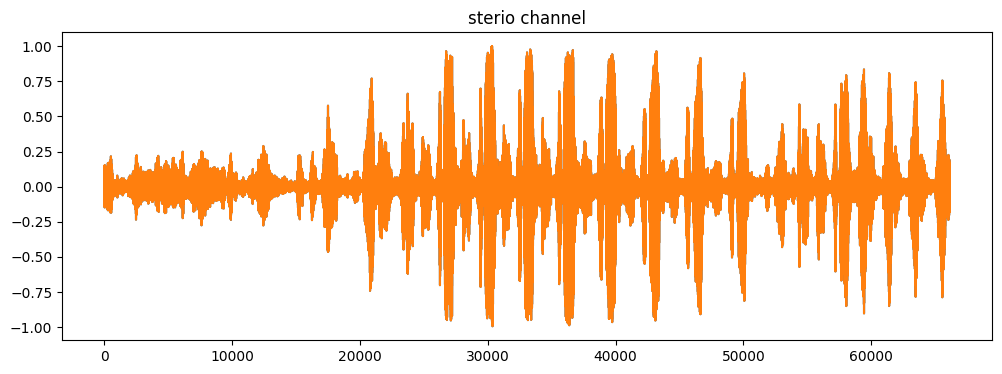

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
plt.plot(librosa_audio)
plt.title('sterio channel')

Text(0.5, 1.0, 'Mono channel')

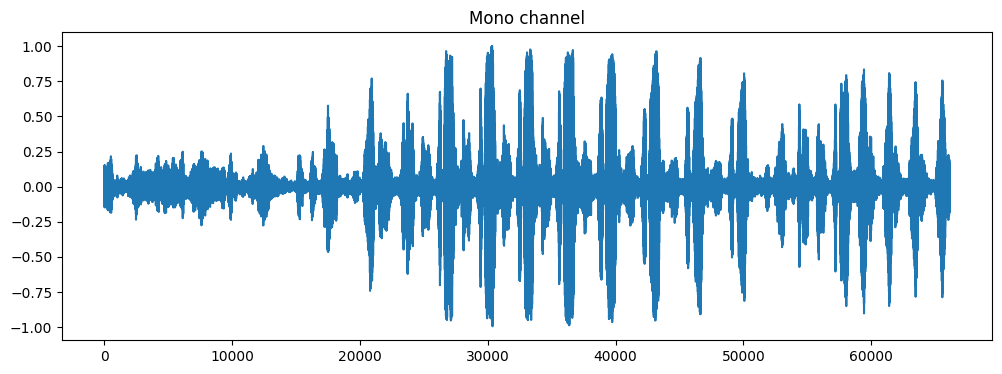

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)
plt.title("Mono channel")

#**MAIN PROJECT**

##Overview

In [24]:
dataset_path='/content/bird_songs_metadata.csv'

In [25]:
import pandas as pd


metadata=pd.read_csv(dataset_path)    #mapping of our file name to folder
metadata.head(10)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
5,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-8.wav
6,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-9.wav
7,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-11.wav
8,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-14.wav
9,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-15.wav


In [26]:
#checking if dataset is imbalanced
#if some classes had lots of data while others had less, dataset is imbalanced anf that would affect results.
metadata.value_counts('name')

name
Song Sparrow            1256
Northern Mockingbird    1182
Northern Cardinal       1074
American Robin          1017
Bewick's Wren            893
dtype: int64

In [27]:
#fold: Folder name
#class id : 3---> dog_bark, 2---->children, 1----> car_horn,.........other classes


#class id: Song Sparrow  ------>1
#Northern Mockingbird    ------>2
#Northern Cardinal       ------>3
#American Robin          ------>4
#Bewick's Wren           ------>5


##Data preprocessing

###Feature extraction

Here we try to convert all information contained in a sound wave into an array based on frequency and time features.

Here we use Mel-Frequency Cepstral Coefficients(MFCC) from audio samples.
Certainly! Let's break down Mel-Frequency Cepstral Coefficients (MFCCs) in simple terms:

Sound Chunks: When we listen to sound, we can think of it as small pieces, like puzzle pieces. We want to understand these small pieces to recognize speech or do other things with audio.

Frequency Information: Sound is made up of different pitches or frequencies, like high and low notes in music. We want to know how much of each pitch is in each small piece of sound.

Human Hearing: Our ears hear some frequencies better than others. MFCCs try to copy how our ears work by focusing more on important frequencies and less on less important ones.

Steps to Get MFCCs:

We split the sound into these small pieces called frames.
We see how much of each pitch is in each frame.
We use filters that work like our ears to help us understand the sound.
We take the results, do some math to make them better, and get the MFCCs.
Use in Computers: Once we have MFCCs, we can use them to teach computers to understand and work with sound. For example, we can tell a computer to recognize words or music.

In simple terms, MFCCs are like breaking sound into small pieces, looking at the important parts, and then using that information to teach computers to understand and work with sound.
https://www.youtube.com/watch?v=4_SH2nfbQZ8

###Generating mfccs for a single sound file

In [28]:
filename= '/content/wavfiles/101308-0.wav'
librosa_audio_data, sample_rate=librosa.load(filename)

mfccs=librosa.feature.mfcc(y=librosa_audio_data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)


(40, 130)


In [29]:
mfccs      #above we generated mfccs for a single sound wave
           #Now these mfccs can uniquely identify this sound wave

array([[-204.45      , -190.86125   , -201.61995   , ..., -167.1792    ,
        -138.02058   , -156.21332   ],
       [  18.654701  ,   40.964626  ,   55.782516  , ...,   12.181263  ,
          -9.135933  ,   -4.390937  ],
       [ -25.691399  ,  -37.517815  ,  -44.9897    , ...,  -53.709114  ,
         -75.31756   ,  -82.25766   ],
       ...,
       [  -5.1552653 ,   -1.7412686 ,    2.571886  , ...,    4.3657618 ,
           2.959579  ,    4.1091723 ],
       [   2.3833237 ,    1.7292849 ,   -0.62879086, ...,   -0.6784827 ,
          -1.9284065 ,    1.616695  ],
       [  -1.9108269 ,   -2.1578617 ,    3.767896  , ...,    6.436124  ,
           2.0231054 ,    0.8849139 ]], dtype=float32)

Till now we generated mfccs for a single sound wave only, so now we do the same for the entire dataset.

###Generating mfccs for every audio file in the dataset

In [30]:
import pandas as pd
import os
import librosa


dataset_path='/content/bird_songs_metadata.csv'
metadata=pd.read_csv(dataset_path)    #mapping of our file name to folder
metadata.head(10)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
5,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-8.wav
6,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-9.wav
7,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-11.wav
8,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-14.wav
9,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-15.wav


In [31]:
def feature_extractor(file):
  librosa_audio_data, sample_rate=librosa.load(file_name, res_type='kaiser_fast')
  mfccs_features=librosa.feature.mfcc(y=librosa_audio_data, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs_features.T, axis=0)   # .T--->Transpose


  return mfccs_scaled_features

**'librosa_audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast')**: This line loads an audio file from a specified file_name. It reads the audio data and its sampling rate using the "kaiser_fast" method. The audio data is like a digital representation of the sound, and the sampling rate is how many "snapshots" of sound are taken per second.

**mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=sample_rate, n_mfcc=40)**: Here, it calculates something called "Mel-Frequency Cepstral Coefficients" (MFCCs). In simpler terms, MFCCs are a set of values that describe the features of the sound, like the shape and characteristics of the sound waves. It's a way to represent the audio in a more useful form for analysis.

**mfccs_scaled_features = np.mean(mfccs_features.T, axis=0):** This line takes the MFCCs features and scales them. Scaling is like adjusting the values to a common range. The np.mean part calculates the average of these scaled features. This average can give you a summary of the audio's characteristics in a simpler way.

In summary, this code takes an audio file, turns it into MFCCs to describe its features, and then simplifies those features by finding their average. This can be useful for various applications, including audio analysis and classification.

In [32]:
#!pip install librosa==0.8.1    #to prevent error in next code

In [33]:
import numpy as np
from tqdm import tqdm   #to see progress
extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()):
  file_name=os.path.join("/content/wavfiles"+'/', str(row["filename"]))
  final_class_labels=row["name"]
  data=feature_extractor("filename")
  extracted_features.append([data, final_class_labels])


5422it [01:19, 68.30it/s]


**import numpy as np**: This line imports a Python library called NumPy, which is used for numerical operations and data manipulation. It's often used in data science and mathematical computations.

**from tqdm import tqdm**: This line imports a library called "tqdm" that provides a progress bar for loops and tasks. It's used to visualize the progress of a loop.

**extracted_features = []**: Here, an empty list called extracted_features is created. This list will be used to store data as the code progresses.

**for index_num, row in tqdm(metadata.iterrows()):**: This line starts a loop that iterates through each row in a variable called metadata. Each row represents some data. The tqdm function is used to show the progress of the loop.

**file_name = os.path.join("/content/drive/My Drive/SE_Minor_Project/UrbanSound8K/audio" + '/' + 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))**: In this line, a file path is constructed using various pieces of information. It's taking the "fold" and "slice_file_name" from the current row in metadata and creating a full file path.

**final_class_labels = row["class"]**: This line extracts the "class" label from the current row. This label likely represents the category or class of the data.

**data = feature_extractor(filename)**: Here, it calls a function called feature_extractor and passes the filename (which was created in line 5) as an argument. This function is expected to extract some features from the audio file.

**extracted_features.append([data, final_class_labels]): **Finally, this line adds a list containing data (the features extracted from the audio) and final_class_labels (the class label) to the extracted_features list. This essentially collects the extracted features and their corresponding class labels.

In summary, the code reads data from the metadata variable, constructs file paths, extracts class labels, and then calls a function to extract features from audio files, storing them in the extracted_features list. This loop processes multiple rows of data, one at a time.

extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class']): This line takes the list of extracted_features and converts it into a table-like structure called a Pandas DataFrame. Think of it as making a neat table where each row represents a set of features and a class label. The columns argument specifies the names of the columns in the DataFrame: 'feature' and 'class'.

In [34]:
import numpy as np

# Save the extracted features to a NumPy file
np.save('extracted_features.npy', extracted_features)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [35]:
# Define the destination folder in Google Drive
drive_folder_path = '/content/drive/My Drive/SE_Minor_Project/Birds_sound'  # Destination folder in Google Drive

# Copy the file to Google Drive
!cp "extracted_features.npy" "/content/drive/My Drive/SE_Minor_Project/Birds_sound"


instead of wasting time in creating features everytime, we can directly load them from below as we have saved the features already.

In [36]:
# Load the saved features with allow_pickle=True



In [37]:

import pandas as pd
import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import numpy as np
import librosa.display

file_path = '/content/drive/My Drive/SE_Minor_Project/Birds_sound/extracted_features.npy'
extracted_features = np.load(file_path, allow_pickle=True)


In [38]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-132.85225, 81.1399, 17.018223, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885643, 44.118813, 1...",Bewick's Wren
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8...",Bewick's Wren


###Splitting dataset into independent and dependent dataset

In [39]:
X=np.array(extracted_features_df['feature'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

X = np.array(extracted_features_df['feature'].tolist()): This line creates a NumPy array X from the 'feature' column of the extracted_features_df DataFrame. The 'feature' column likely contains the extracted features from your audio data. tolist() converts the column into a list, and np.array() turns that list into a NumPy array. You can think of X as a collection of your audio features.

 this code is preparing your data for machine learning or analysis by converting the feature and class label columns from the DataFrame into two separate arrays, X for features and Y for class labels. These arrays are easier to work with in many data analysis and machine learning tasks.

In [40]:
X.shape


(5422, 40)

In [41]:
Y

array(["Bewick's Wren", "Bewick's Wren", "Bewick's Wren", ...,
       'Northern Cardinal', 'Northern Cardinal', 'Northern Cardinal'],
      dtype='<U20')

In [42]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))

#MODEL CREATION

##1. SVM
creating SVM Model and confusion matrix for the same

5422it [01:14, 72.67it/s]


Accuracy: 65.81%


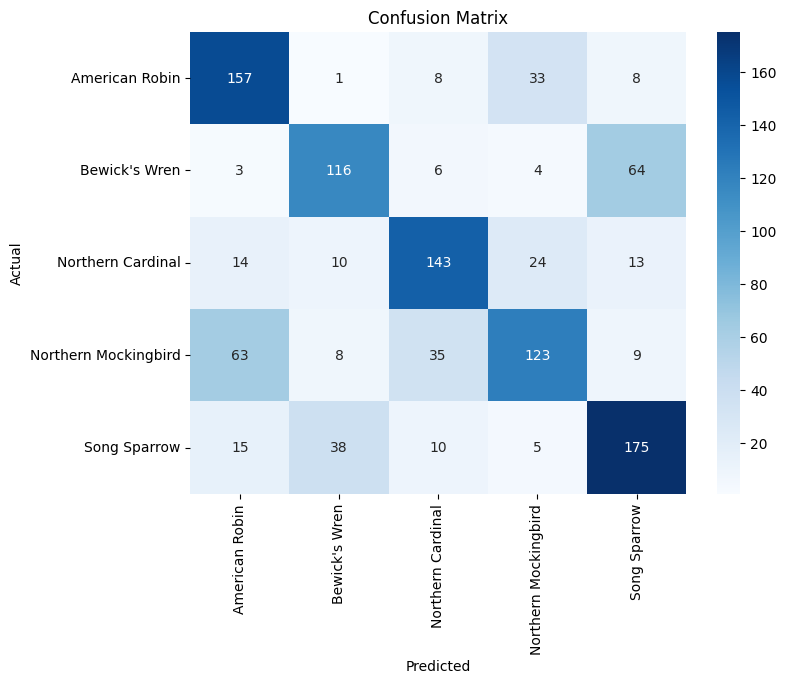

In [43]:
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load metadata
dataset_path = '/content/bird_songs_metadata.csv'
metadata = pd.read_csv(dataset_path)

# Function to extract MFCC features
def feature_extractor(file):
    librosa_audio_data, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Extract features and labels
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join("/content/wavfiles", str(row["filename"]))
    final_class_labels = row["name"]
    data = feature_extractor(file_name)
    extracted_features.append([data, final_class_labels])

# Convert to NumPy array
features = np.array([x[0] for x in extracted_features])
labels = np.array([x[1] for x in extracted_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Reshape data for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svm_classifier.fit(X_train_flat, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In machine learning, SVMs expect input data to be in the form of a matrix where each row corresponds to a data point, and each column corresponds to a feature of that data point. However, the feature extraction process often results in a matrix where each row represents a feature, and each column represents a specific time point or frequency bin. SVMs, particularly when using a linear kernel, work best with flattened, one-dimensional arrays.

X_train and X_test are 2D arrays where each row represents a different audio sample, and columns represent the extracted features over time or frequency.
X_train.shape[0] gives the number of samples in the training set.
X_train.shape[1:] gives the shape of the feature matrix excluding the number of samples.
X_train.reshape(X_train.shape[0], -1) then reshapes the 2D feature matrix into a 2D array where each row corresponds to a sample, and all the feature values are flattened into a single row.
This transformation maintains the individuality of each sample while ensuring that the SVM can effectively learn from the features.

Create and Train SVM Classifier:
The Support Vector Machine (SVM) is a supervised machine learning algorithm that aims to find a hyperplane that best separates the data into different classes. The choice of the kernel determines the mathematical function used to transform the input features into a higher-dimensional space, making the data more amenable to separation.

SVC(kernel='linear', C=1.0): This initializes an SVM classifier with a linear kernel. A linear kernel means the decision boundary is a straight line, and C controls the regularization strength. A higher C value allows the model to fit the training data more closely, but it might lead to overfitting.

svm_classifier.fit(X_train_flat, y_train): This trains the SVM classifier on the training data. The X_train_flat data is the flattened feature matrix, and y_train contains the corresponding labels for each audio sample.

The training process involves finding the optimal hyperplane that best separates the data into different classes based on the provided features and labels. The SVM aims to maximize the margin between different classes, enhancing its ability to generalize to new, unseen data.

Once trained, the svm_classifier can be used to make predictions on new, unseen data (X_test_flat) and evaluate its performance.

##2. CNN

In [44]:
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load metadata
dataset_path = '/content/bird_songs_metadata.csv'
metadata = pd.read_csv(dataset_path)

# Function to extract MFCC features
def feature_extractor(file):
    librosa_audio_data, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=sample_rate, n_mfcc=40)
    return mfccs_features

# Extract features and labels
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join("/content/wavfiles", str(row["filename"]))
    final_class_labels = row["name"]
    data = feature_extractor(file_name)
    extracted_features.append([data, final_class_labels])

# Convert to NumPy array
features = np.array([x[0] for x in extracted_features])
labels = np.array([x[1] for x in extracted_features])

# Encode labels into numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Reshape the data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy * 100:.2f}%")


5422it [01:21, 66.35it/s]


Epoch 1/10
136/136 [==============================] - 6s 11ms/step - loss: 3.6507 - accuracy: 0.4060 - val_loss: 1.1346 - val_accuracy: 0.5180
Epoch 2/10
136/136 [==============================] - 1s 7ms/step - loss: 1.0042 - accuracy: 0.5847 - val_loss: 1.0129 - val_accuracy: 0.5724
Epoch 3/10
136/136 [==============================] - 1s 7ms/step - loss: 0.8048 - accuracy: 0.6774 - val_loss: 0.9872 - val_accuracy: 0.6083
Epoch 4/10
136/136 [==============================] - 1s 7ms/step - loss: 0.6469 - accuracy: 0.7540 - val_loss: 1.0035 - val_accuracy: 0.6129
Epoch 5/10
136/136 [==============================] - 1s 7ms/step - loss: 0.4830 - accuracy: 0.8213 - val_loss: 0.9115 - val_accuracy: 0.6452
Epoch 6/10
136/136 [==============================] - 1s 8ms/step - loss: 0.3641 - accuracy: 0.8700 - val_loss: 0.9481 - val_accuracy: 0.6618
Epoch 7/10
136/136 [==============================] - 1s 9ms/step - loss: 0.2340 - accuracy: 0.9244 - val_loss: 0.9791 - val_accuracy: 0.6848
Epoch

 Building the CNN Model:

A Sequential model is created using Keras.
The model starts with a convolutional layer (Conv2D) with 32 filters, each of size (3, 3), using the ReLU activation function.
Max pooling is applied with a pool size of (2, 2).
Another convolutional layer with 64 filters is added, followed by another max pooling layer.
The data is then flattened and passed through a dense layer with 128 neurons and ReLU activation.
The final dense layer has neurons equal to the number of classes with a softmax activation function, suitable for multi-class classification.

Training the Model:

The model is trained using the training data, with validation on the test data, for 10 epochs and a batch size of 32.

The model is evaluated on the test data, and the accuracy is printed.
In summary, the CNN is designed to automatically learn hierarchical features from the MFCC representations of bird songs. Convolutional layers capture local patterns, and max pooling reduces spatial dimensions. The flattened output is then used in fully connected layers for classification. The model is trained to minimize the sparse categorical cross-entropy loss.







#3. ANN

In [45]:
Y.shape    #this has 5 as we have 5 classes

(5422, 5)

###Train test split

In [46]:
#splitting dataset into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [47]:
X_train.shape

(4337, 40)

In [48]:
X_test.shape

(1085, 40)

In [49]:
Y_train.shape

(4337, 5)

In [50]:
Y_test.shape

(1085, 5)

In [51]:
  import tensorflow as tf

In [52]:
tf.__version__

'2.15.0'

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [54]:
num_labels=Y.shape[1]   #No of classes we got from Y test i.e. (1747, 5) = 5

In [55]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))   #last layer has our 5 classes
model.add(Activation('softmax'))

**model = Sequential():** This line initializes a neural network model using a library like Keras. The Sequential model allows you to create a neural network with layers stacked on top of each other.

**model.add(Dense(100, input_shape=(40,))**: Here, you're adding the first layer to your neural network. It's a densely connected (or fully connected) layer with 100 neurons. The input_shape parameter indicates that the input to this layer has 40 features. This layer takes the initial input data.

**model.add(Activation('relu'))**: After the first layer, you're adding an activation function. In this case, it's the Rectified Linear Unit (ReLU) activation function. It's a common choice for hidden layers in neural networks because it introduces non-linearity to the model.

**model.add(Dropout(0.5))**: This line adds a dropout layer. Dropout is a technique used to prevent overfitting in neural networks. It randomly drops a portion of the neurons during training to make the network more robust.

Similar to the first layer, you're adding two more layers (Dense, Activation, and Dropout) in the same way for the second and third layers.

model.add(Dense(num_labels): Finally, the last layer is added. This layer has as many neurons as there are output labels (represented by num_labels). It's typically used for classification tasks, and the number of neurons here corresponds to the number of classes you want to classify your data into.

model.add(Activation('softmax')): The activation function for the final layer is set to 'softmax'. This function is often used in classification tasks because it converts the network's output into probabilities, making it easier to determine the most likely class.

In **summary**, this code sets up a neural network model with multiple layers. Each layer consists of densely connected neurons, an activation function, and a dropout layer. The final layer is used for classifying your data, and the network is designed to make predictions based on the features provided as input.

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [57]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

model.compile: This is a crucial step when working with neural networks. It prepares the model for training by specifying how it should learn from the data.

loss='categorical_crossentropy': This part tells the model how to measure the error between the predicted outputs and the actual target values. 'Categorical cross-entropy' is a common choice for classification problems. It quantifies the difference between the predicted class probabilities and the true class labels.

metrics=['accuracy']: Metrics are used to evaluate the performance of the model. In this case, you're using 'accuracy' as the metric. It measures how well the model is performing by calculating the percentage of correctly predicted instances. Higher accuracy means better performance.

optimizer='adam': The optimizer is responsible for adjusting the model's internal parameters during training to minimize the loss. 'Adam' is a popular optimization algorithm. It helps the model learn by updating the weights of the neural network in an efficient way.

In simple terms, this line sets up the model for training. It specifies how the model should measure its performance ('loss'), which metric to report during training ('accuracy'), and the optimization algorithm ('adam') that will help the model improve over time. It's like telling the model how to learn and evaluate itself as it processes the data.

Epoch 1/150
136/136 [==============================] - ETA: 0s - loss: 0.4654 - accuracy: 0.8192
Epoch 1: val_loss improved from inf to 0.33036, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 1s 7ms/step - loss: 0.4654 - accuracy: 0.8192 - val_loss: 0.3304 - val_accuracy: 0.8940
Epoch 2/150
124/136 [==========================>...] - ETA: 0s - loss: 0.4670 - accuracy: 0.8198
Epoch 2: val_loss did not improve from 0.33036
136/136 [==============================] - 1s 6ms/step - loss: 0.4655 - accuracy: 0.8202 - val_loss: 0.3603 - val_accuracy: 0.8931
Epoch 3/150
135/136 [============================>.] - ETA: 0s - loss: 0.4575 - accuracy: 0.8266
Epoch 3: val_loss did not improve from 0.33036
136/136 [==============================] - 1s 7ms/step - loss: 0.4573 - accuracy: 0.8268 - val_loss: 0.3502 - val_accuracy: 0.9069
Epoch 4/150
127/136 [===========================>..] - ETA: 0s - loss: 0.4595 - accuracy: 0.8263
Epoch 4: val_loss did 

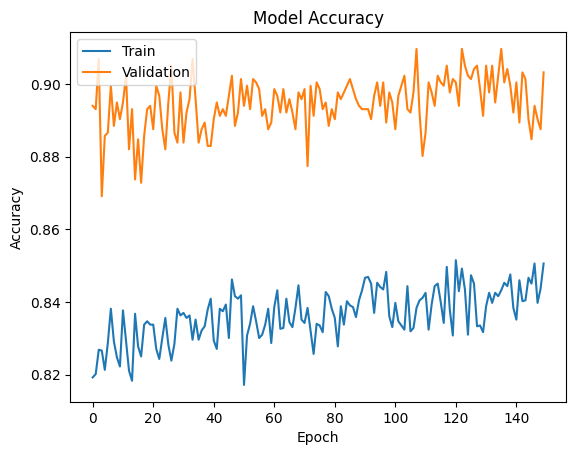

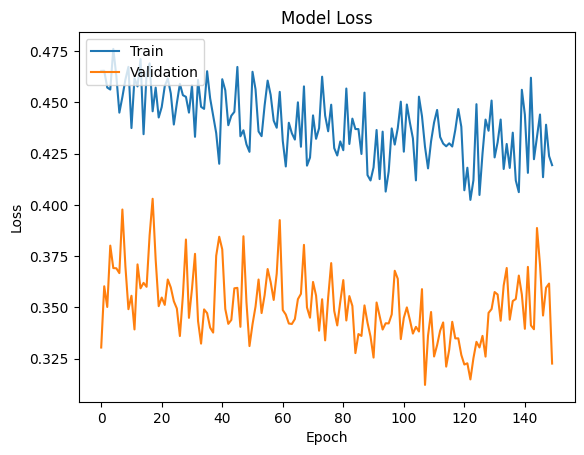

In [67]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history=model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

import matplotlib.pyplot as plt

# Assuming you have already defined and compiled your model as 'model'
# and have your training data (X_train, y_train) and validation data (X_val, y_val)



# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**from tensorflow.keras.callbacks import ModelCheckpoint**: This line imports a special callback from TensorFlow that helps you save the best model during training.

**from datetime import datetime**: Here, you import a module to keep track of time.

**num_epochs = 100**: You're setting the number of times you want to go through your entire dataset during training. Think of it as how many rounds of practice you want your model to have.

**num_batch_size = 32**: During each round of practice, you don't want to look at all your data at once; it can be overwhelming. So, you break it into smaller groups, each containing 32 examples. It's like studying a few pages of a book at a time.

**checkpointer = ModelCheckpoint(...)**: This prepares a way to save your model's progress. It's like having a snapshot of your model at its best during training.

**start = datetime.now()**: You're noting the current time to keep track of how long the training takes.

**model.fit(...)**: This is where the real training happens. You're telling your model to learn from the training data (X_train and Y_train) over 100 rounds (epochs). It will also check how well it's doing on a separate set of data (X_test and Y_test). The callbacks parameter says to use the checkpointer to save the best version of the model.

**duration = datetime.now() - start**: After training, you calculate how much time it took.

**print("Training completed in time: ", duration)**: Finally, you print out how long the training process took.

So, this code sets up and runs the training of your model, saving the best version along the way, and tells you how long it took. It's like coaching your model to get better and keeping a record of its progress.

Overfitting: If your training accuracy is significantly higher than your validation accuracy, it could indicate overfitting. Overfitting occurs when the model learns the training data too well, capturing noise or specific patterns that don't generalize to new, unseen data.

in our case its not so, thus we do not face Overfitting in ANN

In [68]:
test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

0.9032257795333862


Thus we see that we get max accuracy in ANN, so we proceed with that as our final model.

###TESTING OUR ANN MODEL to see how it predicts a new audio file
Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [60]:
import librosa
import IPython.display as ipd

filename = '/content/wavfiles/101308-0.wav'


data, sample_rate = librosa.load(filename)
ipd.Audio(data, rate=sample_rate)

Now we need to convert this class number(2) to actual class name.
We have the following 5 classes in our dataset ,

In [61]:
metadata['name'].unique()

array(["Bewick's Wren", 'Northern Mockingbird', 'American Robin',
       'Song Sparrow', 'Northern Cardinal'], dtype=object)

In [62]:
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Use the model to predict probabilities for each class
predicted_probabilities = model.predict(mfccs_scaled_features)

# Get the class with the highest probability as the predicted class
predicted_class_index = np.argmax(predicted_probabilities)

# You can map the index back to the class label using your label encoder
predicted_class = labelencoder.inverse_transform([predicted_class_index])

print(f"Predicted class: {predicted_class[0]}")


[-166.79272      7.042578   -46.644314    69.26235    -42.07563
   -5.9357715   18.282722    -5.7668495   -4.785081     4.851345
  -11.31777      7.7867723   -9.5649805    2.5537522   -3.7126012
    2.3120487   -3.6186843    1.2978361   -3.2064133   -0.372722
   -2.273648    -1.4672071   -4.9267197    1.8690922   -4.5939603
    1.4172201   -0.7823382    2.552671    -3.36726      4.7001057
   -3.48338      3.6841705   -2.7026377    1.6344639   -2.261762
    1.6842973   -3.35069      1.717598    -1.4370406    1.7518529]
[[-166.79272      7.042578   -46.644314    69.26235    -42.07563
    -5.9357715   18.282722    -5.7668495   -4.785081     4.851345
   -11.31777      7.7867723   -9.5649805    2.5537522   -3.7126012
     2.3120487   -3.6186843    1.2978361   -3.2064133   -0.372722
    -2.273648    -1.4672071   -4.9267197    1.8690922   -4.5939603
     1.4172201   -0.7823382    2.552671    -3.36726      4.7001057
    -3.48338      3.6841705   -2.7026377    1.6344639   -2.261762
     1.68429

#SAVING OUR MODEL IN DRIVE

In [63]:
# Save the trained ANN model to a file in our Google Drive
model.save('/content/drive/My Drive/SE_Minor_Project/Birds_sound/birds_sound_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


To Load Your Model from Google Drive:

In a new Colab session or notebook, mount your Google Drive again.
python
Copy code
from google.colab import drive
drive.mount('/content/drive')
Load your model using the load_model function from Keras.
python
Copy code
from tensorflow.keras.models import load_model

# Load the model from your Google Drive
loaded_model = load_model('/content/drive/My Drive/Your_Model_Folder/your_model.h5')
Replace 'Your_Model_Folder' and 'your_model.h5' with the folder path and model file name that you used to save your model.

With these steps, you can save your trained model to Google Drive and load it back whenever you need it, without the need to retrain it each time you open your Colab notebook.

##Model evaluation

In [69]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)



# Assuming y_test contains the true labels in one-hot encoded format
# Convert one-hot encoded labels to class indices
y_true = np.argmax(Y_test, axis=1)

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(class_report)

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")



34/34 [==============================] - 0s 2ms/step
Confusion Matrix:
[[197   2   2   6   5]
 [  0 171   2   2  14]
 [  0   3 197   7   7]
 [ 17   1   5 196   7]
 [  0  11  13   1 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       212
           1       0.91      0.90      0.91       189
           2       0.90      0.92      0.91       214
           3       0.92      0.87      0.89       226
           4       0.87      0.90      0.88       244

    accuracy                           0.90      1085
   macro avg       0.90      0.90      0.90      1085
weighted avg       0.90      0.90      0.90      1085

Accuracy: 90.32%
